In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data = pd.read_csv('cses4_cut.csv')

In [3]:
data.head()

,Unnamed: 0,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,0,1,4,4,2,2,9,9,9,1,...,9,9,8300,121,8,999,999,4,31,True
1,1,2,3,1,2,2,9,9,9,8,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,2,1,2,2,9,9,9,7,...,5,9,1101,121,2,999,999,4,67,True
3,4,2,4,4,2,2,9,9,9,5,...,9,9,8300,121,2,999,999,4,26,False
4,5,1,6,4,1,1,9,9,9,1,...,1,9,1101,121,2,999,999,4,55,True


In [4]:
data.shape

(12451, 33)

In [5]:
data.describe

<bound method NDFrame.describe of        Unnamed: 0  D2002  D2003  D2004  D2005  D2006  D2007  D2008  D2009  \
0               0      1      4      4      2      2      9      9      9   
1               1      2      3      1      2      2      9      9      9   
2               2      2      2      1      2      2      9      9      9   
3               4      2      4      4      2      2      9      9      9   
4               5      1      6      4      1      1      9      9      9   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
12446       74253      2      4      1      2      2      9      9      9   
12447       74254      1      3      1      2      2      9      9      9   
12448       74255      2      6      2      2      2      9      9      9   
12449       74256      2      7      1      2      1      9      9      9   
12450       74257      1      4      1      2      2      9      9      9   

       D2010  ...  D2024  D2025  D2026  D

In [6]:
# from this survey result, it seems like that D2005 to D2009 has similiar value and same order.

In [7]:
for column in data:
    print(column)
    print(data[column].value_counts())
    print('-----------------')

Unnamed: 0
0        1
53890    1
53866    1
53868    1
53869    1
        ..
27738    1
27739    1
27740    1
27742    1
74257    1
Name: Unnamed: 0, Length: 12451, dtype: int64
-----------------
D2002
2    6623
1    5828
Name: D2002, dtype: int64
-----------------
D2003
4     4297
2     2184
3     2160
7     1214
1      766
5      572
6      565
8      436
96     168
9       49
97      20
99      18
98       2
Name: D2003, dtype: int64
-----------------
D2004
1    7607
4    2592
3     857
9     738
2     621
7      27
8       9
Name: D2004, dtype: int64
-----------------
D2005
2    10472
9     1108
1      789
8       54
7       28
Name: D2005, dtype: int64
-----------------
D2006
2    9552
9    2206
1     564
8      90
7      39
Name: D2006, dtype: int64
-----------------
D2007
9    7086
2    5211
1      93
8      42
7      19
Name: D2007, dtype: int64
-----------------
D2008
9    7087
2    5192
1     113
8      41
7      18
Name: D2008, dtype: int64
-----------------
D2009
9    7086


In [8]:
# Data Cleaning
# Before the machine Learning, I would like to clean the dataset first for getting rid of unmeaningful data

In [9]:
data = data.drop(columns = ['Unnamed: 0'])

In [10]:
# proved that D 2005 to D 2009 has very smiliar value and order, which is not meaningful for the research analysis. So I would drop out these except D2009 and Unnamed:0.
data = data.drop(columns = ['D2005','D2006', 'D2007','D2008'])

In [11]:
data.head()

,D2002,D2003,D2004,D2009,D2010,D2011,D2012,D2013,D2014,D2015,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,9,1,422,1,2,3,99,...,9,9,8300,121,8,999,999,4,31,True
1,2,3,1,9,8,999,9,9,9,1,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,1,9,7,818,2,2,2,8,...,5,9,1101,121,2,999,999,4,67,True
3,2,4,4,9,5,513,1,2,3,99,...,9,9,8300,121,2,999,999,4,26,False
4,1,6,4,9,1,235,1,1,3,99,...,1,9,1101,121,2,999,999,4,55,True


In [12]:
# unique values in each columns
for x in data.columns:
    #prinfting unique values
    print(x ,':', len(data[x].unique()))

D2002 : 2
D2003 : 13
D2004 : 7
D2009 : 5
D2010 : 14
D2011 : 131
D2012 : 7
D2013 : 9
D2014 : 7
D2015 : 15
D2016 : 124
D2017 : 7
D2018 : 9
D2019 : 7
D2020 : 8
D2021 : 22
D2022 : 18
D2023 : 11
D2024 : 9
D2025 : 7
D2026 : 49
D2027 : 31
D2028 : 50
D2029 : 9
D2030 : 8
D2031 : 5
age : 81
voted : 2


In [13]:
# To check the missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D2002   12451 non-null  int64
 1   D2003   12451 non-null  int64
 2   D2004   12451 non-null  int64
 3   D2009   12451 non-null  int64
 4   D2010   12451 non-null  int64
 5   D2011   12451 non-null  int64
 6   D2012   12451 non-null  int64
 7   D2013   12451 non-null  int64
 8   D2014   12451 non-null  int64
 9   D2015   12451 non-null  int64
 10  D2016   12451 non-null  int64
 11  D2017   12451 non-null  int64
 12  D2018   12451 non-null  int64
 13  D2019   12451 non-null  int64
 14  D2020   12451 non-null  int64
 15  D2021   12451 non-null  int64
 16  D2022   12451 non-null  int64
 17  D2023   12451 non-null  int64
 18  D2024   12451 non-null  int64
 19  D2025   12451 non-null  int64
 20  D2026   12451 non-null  int64
 21  D2027   12451 non-null  int64
 22  D2028   12451 non-null  int64
 23  D2029   124

In [14]:
# check the null values
print(data.isnull().sum())

D2002    0
D2003    0
D2004    0
D2009    0
D2010    0
D2011    0
D2012    0
D2013    0
D2014    0
D2015    0
D2016    0
D2017    0
D2018    0
D2019    0
D2020    0
D2021    0
D2022    0
D2023    0
D2024    0
D2025    0
D2026    0
D2027    0
D2028    0
D2029    0
D2030    0
D2031    0
age      0
voted    0
dtype: int64


In [15]:
print(data['voted'].value_counts())

True     10226
False     2225
Name: voted, dtype: int64


In [16]:
# categorical to change to numeric label. LabelEncoder() can be used to achieve this:
from sklearn.preprocessing import LabelEncoder
label_voted = LabelEncoder()
data['voted'] = label_voted.fit_transform(data['voted'])

In [17]:
data.head(5)

,D2002,D2003,D2004,D2009,D2010,D2011,D2012,D2013,D2014,D2015,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,9,1,422,1,2,3,99,...,9,9,8300,121,8,999,999,4,31,1
1,2,3,1,9,8,999,9,9,9,1,...,6,9,1101,121,12,999,999,4,42,1
2,2,2,1,9,7,818,2,2,2,8,...,5,9,1101,121,2,999,999,4,67,1
3,2,4,4,9,5,513,1,2,3,99,...,9,9,8300,121,2,999,999,4,26,0
4,1,6,4,9,1,235,1,1,3,99,...,1,9,1101,121,2,999,999,4,55,1


In [18]:
ohe = ['D2002','D2003','D2004','D2009','D2010','D2011','D2012','D2013','D2014','D2015','D2016','D2017','D2018','D2019','D2020','D2021','D2016','D2017','D2018','D2019','D2020','D2021','D2022','D2023','D2024','D2025','D2026','D2027','D2016','D2017','D2018','D2019','D2020','D2021','D2016','D2017','D2018','D2019','D2020','D2021','D2022','D2023','D2024','D2025','D2026','D2027','D2028','D2029','D2030','D2031']

In [19]:
new_data= pd.get_dummies(data, prefix=ohe, columns= ohe)

In [20]:
new_data

,age,voted,D2002_1,D2002_2,D2003_1,D2003_2,D2003_3,D2003_4,D2003_5,D2003_6,...,D2030_4,D2030_996,D2030_997,D2030_998,D2030_999,D2031_1,D2031_2,D2031_3,D2031_4,D2031_9
0,31,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,42,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,67,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,26,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,55,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,62,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12447,65,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12448,61,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
12449,53,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Machine Learning

In [21]:
#Import necessary libraries and metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold

In [22]:
# Variable Selection: Setting the dependent and independent variables
Y = new_data['voted']
X= new_data.drop(columns = ['voted'], axis=1)

In [23]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
# Scaling the data to take account of variations in mean and standard deviations
sc=StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.fit_transform(X_test)
X_train1[:]
X_test1[:]

array([[-0.1477772 , -0.95562045,  0.95562045, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-1.27586541,  1.04644056, -1.04644056, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-1.03837316,  1.04644056, -1.04644056, ..., -0.1530302 ,
        -0.66010217,  1.25221453],
       ...,
       [ 1.75216085, -0.95562045,  0.95562045, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-1.03837316, -0.95562045,  0.95562045, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [ 1.09905715, -0.95562045,  0.95562045, ..., -0.1530302 ,
        -0.66010217,  1.25221453]])

In [25]:
norm = StandardScaler().fit(X)

# transform training data
X_train_norm = norm.transform(X_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

Scaled Train Data: 


[[-0.14477062 -0.93806384  0.93806384 ... -0.16628105 -0.64661375
   1.25782495]
 [-1.08810699 -0.93806384  0.93806384 ... -0.16628105  1.54651831
  -0.79502319]
 [ 0.9164828   1.06602553 -1.06602553 ... -0.16628105 -0.64661375
  -0.79502319]
 ...
 [ 0.56273166 -0.93806384  0.93806384 ... -0.16628105 -0.64661375
  -0.79502319]
 [ 0.68064871 -0.93806384  0.93806384 ... -0.16628105 -0.64661375
   1.25782495]
 [-1.32394108 -0.93806384  0.93806384 ... -0.16628105 -0.64661375
   1.25782495]]


In [26]:
#Create a function within many Machine Learning Models
def LinReg(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    #Using Logistic Regression Algorithm to the Training Set
    log = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=2000)
    log.fit(X_train, Y_train)
    predictions = log.predict(X_test)
    

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
    print ("[0]Logistic Regression AUC Score : %f" % roc_auc_score(Y_test, predictions))
    
    return log


In [27]:
def KNeig(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    
    print('[1]K Nearest Neighbor Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
    print ("[1]K Nearest Neighbor AUC Score : %f" % roc_auc_score(Y_test, predictions))

      
    return knn

In [28]:
def svcm(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(gamma='auto', kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    predictions = svc_lin.predict(X_test)
    
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
    print ("[2]Support Vector Machine (Linear Classifier) AUC Score : %f" % roc_auc_score(Y_test, predictions))
    
    return svc_lin

In [29]:
def DecTree(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    predictions = tree.predict(X_test)
    print('[3]Decision Tree Classifier Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
    print ("[3]Decision Tree Classifier AUC Score : %f" % roc_auc_score(Y_test, predictions))

    return tree


In [ ]:
#Create a function within many Machine Learning Models
def RanForest(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 5000, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    predictions = forest.predict(X_test)
      
  #print model accuracy on the training data.
    print('[4]Random Forest Classifier Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
    print ("[4]Random Forest Classifier AUC Score : %f" % roc_auc_score(Y_test, predictions))


    return forest

# Evaluating Performance on Traning Sets

In [31]:
LinReg(X,Y)

[0]Logistic Regression Training Accuracy: 0.8615
[0]Logistic Regression AUC Score : 0.641790


LogisticRegression(max_iter=2000, random_state=0)

In [32]:
KNeig(X,Y)

[1]K Nearest Neighbor Training Accuracy: 0.8575
[1]K Nearest Neighbor AUC Score : 0.665743


KNeighborsClassifier()

In [33]:
svcm(X,Y)

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8615
[2]Support Vector Machine (Linear Classifier) AUC Score : 0.610553


SVC(gamma='auto', kernel='linear', random_state=0)

In [34]:
DecTree(X,Y)

[3]Decision Tree Classifier Training Accuracy: 0.7961
[3]Decision Tree Classifier AUC Score : 0.650439


DecisionTreeClassifier(criterion='entropy', random_state=0)

[4]Random Forest Classifier Training Accuracy: 0.8699
[4]Random Forest Classifier AUC Score : 0.633172
['age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7' 'D2003_8' 'D2003_9' 'D2003_96' 'D2003_97'
 'D2003_98' 'D2003_99' 'D2004_1' 'D2004_2' 'D2004_3' 'D2004_4']


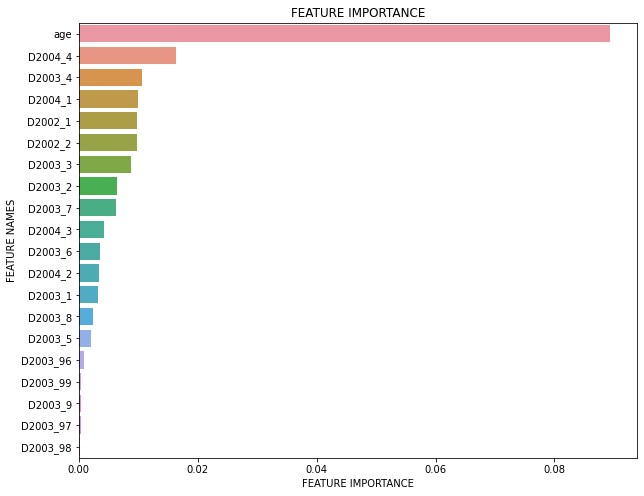

In [35]:
RanForest(X,Y)

In [ ]:
#RanForest(X['age','D2002_1','D2002_2','D2003_1','D2003_2','D2003_3','D2003_4','D2003_5','D2003_6','D2003_7','D2003_8','D2003_9','D2003_96','D2003_97','D2003_98','D2003_99','D2004_1','D2004_2','D2004_3','D2004_4'],Y)

# Optimization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = X.copy()
col_names = X.columns
features = X[col_names]

data_scaled[col_names] = scaler.fit_transform(features.values)

In [40]:
KNeig(data_scaled,Y)

[1]K Nearest Neighbor Training Accuracy: 0.8226
[1]K Nearest Neighbor AUC Score : 0.578450


KNeighborsClassifier()

# Finding a best features

In [43]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(15,'Score'))

       Specs        Score
0        age  3763.177437
19   D2004_4   439.346786
16   D2004_1   110.440446
9    D2003_7    42.992661
6    D2003_4    27.951370
5    D2003_3    21.047711
10   D2003_8    19.496158
4    D2003_2     7.214727
12  D2003_96     6.199791
17   D2004_2     5.047920
7    D2003_5     3.721072
13  D2003_97     2.278766
11   D2003_9     1.657446
8    D2003_6     1.487155
15  D2003_99     1.431323


# Random Search

In [41]:
from pprint import pprint

# Number of trees in random forest, I choose low because otherwise takes lot of time.
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}


In [ ]:
#With these features, it performed best. That's why we will implement grid search on this data.
new_X = X[['age','D2002_1','D2002_2','D2003_1','D2003_2','D2003_3','D2003_4','D2003_5','D2003_6','D2003_7','D2003_8','D2003_9','D2003_96','D2003_97','D2003_98','D2003_99','D2004_1','D2004_2','D2004_3','D2004_4']]
X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size = 0.2, random_state = 0)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc')
# Fit the random search model

rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

In [ ]:
random_search.best_score_

In [ ]:
rfc = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_depth= 10)

rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
        
#Print model report:
print('[4]Random Forest Classifier Training Accuracy:', "%.4g" % accuracy_score(Y_test, predictions))
print ("[4]Random Forest Classifier AUC Score : %f" % roc_auc_score(Y_test, predictions))


random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,Y_train)

random_search.best_params_

random_search.best_score_